<a href="https://colab.research.google.com/github/uceku95/Fastai-Powere-Lung-Cancer-Classification/blob/main/Fastai_Powered_Lung_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
print(torch.__version__)

2.1.0+cu118


In [ ]:
torch.cuda.get_device_name(0)

'Tesla K80'

In [2]:
!pip install --upgrade fastai
!pip install --upgrade torch torchvision

In [3]:
import fastai
from fastai.vision.all import *
from fastai.vision.augment import aug_transforms
from fastai.vision.data import ImageDataLoaders
from fastai.vision.learner import cnn_learner
from fastai.metrics import error_rate, accuracy

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
image_directory = '/content/drive/MyDrive/major_lc/lung'

In [6]:
tfms = aug_transforms(do_flip=True, max_rotate=10.0, )

In [7]:
# The transformers are already built into the model
# num_workers = how many subprocesses to use for data loading
data = ImageDataLoaders.from_folder(image_directory, train='Train', valid='Test', ds_tfms=tfms, size=224, bs=64, num_workers=8)

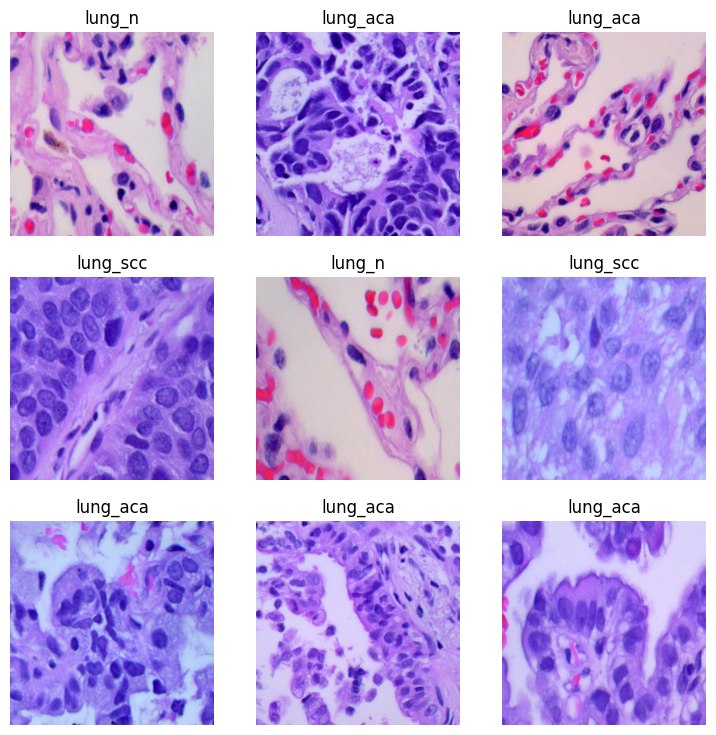

In [8]:
# Show what the data looks like after being transformed
data.show_batch()


In [ ]:
# See the classes and count of classes in your dataset
print(data.classes,data.c)
print(len(data.train_ds), len(data.valid_ds))

['lung_aca', 'lung_n', 'lung_scc'] 3
11250 2250


In [9]:
#To find out all available vision models
dir(models)


['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [10]:
# Build the CNN model with the pretrained resnet34
learn = cnn_learner(data, models.resnet34, metrics = [accuracy])

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 165MB/s]


In [11]:
learn.summary()

Sequential (Input shape: 64 x 3 x 768 x 768)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 384 x 384 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 192 x 192 
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

In [12]:
# Unfreeze all layers of the CNN
learn.unfreeze()

In [ ]:
# Find the optimal learning rate and plot a visual
# Explore lr from start_lr to end_lr over num_it iterations in learn.
learn.lr_find()


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 9.12E-05
Min loss divided by 10: 1.00E-02


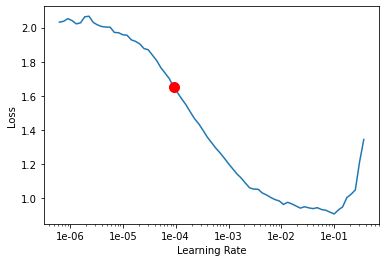

In [ ]:
#Then we plot the loss versus the learning rates.
# we choose a value that is approximately in the middle of the sharpest downward slope.
# Picking a value before the downward slope results in slow training:
learn.recorder.plot(suggestion=True)

 **Fit the model**

In [ ]:
# Fit the model over 2 epochs
learn.fit_one_cycle(2, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.296926,0.057571,0.978667,06:46
1,0.127632,0.035259,0.986667,06:49


In [ ]:
# Save the model
learn.save('/content/drive/MyDrive/Colab Notebooks/data/lung_dataset/models/lung_cancer_classifier')


In [ ]:
# Load the Model
learn.load('/content/drive/MyDrive/Colab Notebooks/data/lung_dataset/models/lung_cancer_classifier')

In [ ]:
# Build a Classification Interpretation object from our learn model
# it can show us where the model made the worse predictions:
interp = ClassificationInterpretation.from_learner(learn)

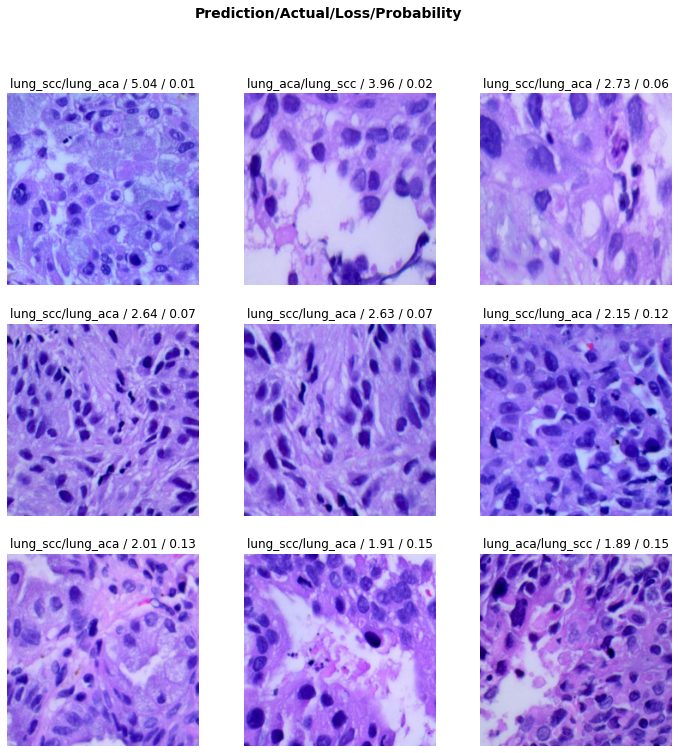

In [ ]:
# Plot the top ‘n’ classes where the classifier has least precision.
interp.plot_top_losses(9, figsize=(12,12), heatmap=False)

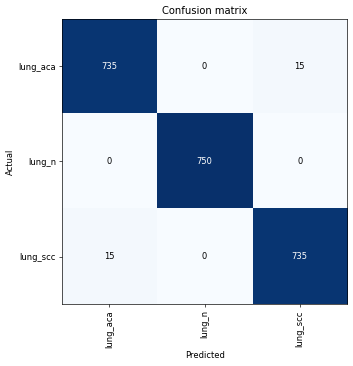

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

In [ ]:
#To view the list of classes most misclassified as a list
interp.most_confused(min_val=2) #We are ignoring single image misclassification

#Sorted descending list of largest non-diagonal entries of confusion matrix,
#presented as actual, predicted, number of occurrences.

[('lung_aca', 'lung_scc', 15), ('lung_scc', 'lung_aca', 15)]